# Chicago Uber/Lyft Trips Before/After COVID-19

- 🏆 80 points available
- 🤠 Author: Park (ypark32@illinois.edu)
- ✏️ Last updated on 10/31/2023

![Case Study Cover Image](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/chicago-rideshare-trips-cover-image.jpg?raw=true)

## 💎 Case overview

Four transportation network providers (TNPs), often called rideshare companies 🚗, have been licensed to operate in Chicago. These TNPs are required to routinely report information on vehicles, drivers, and trips to the City of Chicago, which is published on the [Chicago Data Portal](https://data.cityofchicago.org/). The latest trips dataset can be downloaded from [this page](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p).

### 🐢 Your dataset

- The original dataset contains information about 170 million ridesharing trips between 2018 and 2021. That translates to over 40GB of raw data. 🙀☠️🙀
- **Approximately 1% of the original data has been randomly sampled**, preprocessed, and compressed.
- Only 2019 and 2020 data have been selected.

### ⚔️ Your goal

Analyze the dataset and answer the following questions:

- 👉 How has the COVID-19 affected the total number of trips in 2019 and 2020?
- 👉 How has the COVID-19 affected the number of monthly trips?
- 👉 Have passengers become more generous or frugal when tipping during the pandemic?
- 👉 What were the trip dimensions (trip duration, distance, and fare) of rides taken place right before the July 4th fireworks in 2019 and 2020?
- 👉 Are passengers pooling rides during the pandemic?
- 👉 What are the top 20 pickup areas (by volume)?
- 👉 What are the average trip total for each of the top 20 pickup area?
- 👉 Is there any area that has an unusally large trip total?

---

▶️ Run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
import base64
import unittest
tc = unittest.TestCase()

---

### 🔨 Import packages and dataset

▶️ Run the code cell below to import packages used in the case.

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

# plotly.io is a low-level interface for interacting with figures/
# plotly.io.templates lists available plotly templates
# https://plotly.com/python-api-reference/plotly.io.html
import plotly.io as pio

pd.set_option('display.max_columns', 50)

#### 🧭 Check Plotly Version

Run the code below to ensure that your notebook uses the same Plotly version as the autograder.

In [3]:
# DO NOT CHANGE THE CODE IN THIS CELL
print(f'The current plotly version is {plotly.__version__}')
tc.assertTrue(plotly.__version__.startswith('5.'), 'Your plotly version should be 5.x.x')

The current plotly version is 5.11.0


▶️ Run the code below to import and process the trips dataset.

In [4]:
df = pd.read_csv(
    'https://github.com/bdi475/datasets/raw/main/case-studies/chicago-ridesharing/chicago-ridesharing-trips-2019-2020.csv.gz',
    compression='gzip',
    parse_dates=['start']
)
df_community_areas = pd.read_csv('https://github.com/bdi475/datasets/raw/main/case-studies/chicago-ridesharing/chicago-community-area-numbers.csv')

# replace community area numbers with area names
df = df.merge(df_community_areas, left_on='pickup_area', right_on='area_number', how='left')
df['pickup_area'] = df['community'].copy()
df.drop(columns=['community', 'area_number'], inplace=True)

df = df.merge(df_community_areas, left_on='dropoff_area', right_on='area_number', how='left')
df['dropoff_area'] = df['community'].copy()
df.drop(columns=['community', 'area_number'], inplace=True)

# Create a copy for 🧭 Check Your Work section
df_backup = df.copy()

---

## 📐 Part 1: Data overview

---

### 🎯 Deliverable 1: First 5 rows

#### 👇 Tasks

- ✔️ Display the first 5 rows of `df` using `.head()`.

#### 🚀 Hint

```python
my_dataframe.head()
```

In [5]:
# YOUR CODE BEGINS
df.head(5)
# YOUR CODE ENDS

start  trip_seconds  trip_miles      pickup_area     dropoff_area  \
0 2019-01-01           303         1.4   Garfield Ridge         Clearing   
1 2019-01-01           697         3.0  Near North Side   Near West Side   
2 2019-01-01          1598         4.7     Lincoln Park             Loop   
3 2019-01-01           573         0.9  Near North Side  Near North Side   
4 2019-01-01          1562         2.4  Near North Side  Near North Side   

   fare  tip  additional_charges  trip_total  shared_trip_authorized  \
0   5.0  5.0                7.68       17.68                   False   
1   7.5  0.0                2.50       10.00                   False   
2  10.0  2.0                2.50       14.50                   False   
3   5.0  0.0                2.50        7.50                   False   
4  10.0  0.0                2.50       12.50                   False   

   trips_pooled  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  
0             1   41.792592  -87.769615    41.779583   -87.768511  
1             1   41.892073  -87.628874    41.885300   -87.642808  
2             1   41.922083  -87.634156    41.870607   -87.622173  
3             1   41.892042  -87.631864    41.892508   -87.626215  
4             1   41.900221  -87.629105    41.895033   -87.619711

#### 🧭 Check your work

In [6]:
_test_case = 'deliverable-01'
_points = 2

# manually graded cell
pass

---

### 🎯 Deliverable 2: Summary of DataFrame

#### 👇 Tasks

- ✔️ Print a concise summary of `df` using `.info()`.

#### 🚀 Hint

```python
my_dataframe.info()
```

In [7]:
# YOUR CODE BEGINS
df.info()
# YOUR CODE ENDS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388193 entries, 0 to 1388192
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   start                   1388193 non-null  datetime64[ns]
 1   trip_seconds            1388193 non-null  int64         
 2   trip_miles              1388193 non-null  float64       
 3   pickup_area             1388193 non-null  object        
 4   dropoff_area            1388193 non-null  object        
 5   fare                    1388193 non-null  float64       
 6   tip                     1388193 non-null  float64       
 7   additional_charges      1388193 non-null  float64       
 8   trip_total              1388193 non-null  float64       
 9   shared_trip_authorized  1388193 non-null  bool          
 10  trips_pooled            1388193 non-null  int64         
 11  pickup_lat              1388193 non-null  float64       
 12  pickup_lon    

#### 🧭 Check your work

In [8]:
_test_case = 'deliverable-02'
_points = 2

# manually graded cell
pass

---

### 🎯 Deliverable 3: Number of rows and columns in the dataset

#### 👇 Tasks

- ✔️ Store the number of rows in `df` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df` to a new variable named `num_cols`.

In [9]:
# YOUR CODE BEGINS
num_rows = df.shape[0]
num_cols = df.shape[1]
# YOUR CODE ENDS

print(f'There are {num_rows} rows and {num_cols} columns in the dataset.')

There are 1388193 rows and 15 columns in the dataset.


#### 🧭 Check your work

In [10]:
_test_case = 'deliverable-03'
_points = 2

tc.assertEqual(num_rows, len(df_backup.index), f'Number of rows should be {len(df_backup.index)}')
tc.assertEqual(num_cols, len(df_backup.columns), f'Number of columns should be {len(df_backup.columns)}')

---

## 🗓️ Part 2: Extract datetime values into separate columns

The `start` column contains trip start timestamps. In this part of the case study, you will extract year, month, day of the month, day of the week, hour, and weekday/weekend information into separate columns.

---

### 🎯 Deliverable 4: Extract year into a new column

▶️ Run the code below to print the first 3 values of the `start` column and the data types.

In [11]:
display(df['start'].head(3))
print('=================================================')
print(f"df['start'] column's data type is {df['start'].dtype}.")

0   2019-01-01
1   2019-01-01
2   2019-01-01
Name: start, dtype: datetime64[ns]

df['start'] column's data type is datetime64[ns].


#### 👇 Tasks

- ✔️ From `df`, extract the year (e.g., `2019`, `2020`) from the `start` column and store it to a new column named `year`.

#### 🔑 Expected Output

|         |               start | year |
|--------:|--------------------:|-----:|
|  400000 | 2019-05-28 19:00:00 | 2019 |
|  600000 | 2019-08-12 19:15:00 | 2019 |
|  800000 | 2019-10-29 08:00:00 | 2019 |
| 1000000 | 2020-01-15 12:45:00 | 2020 |
| 1200000 | 2020-06-09 17:00:00 | 2020 |

In [12]:
# YOUR CODE BEGINS
df['year'] = df['start'].dt.year
# YOUR CODE ENDS

# display 5 rows at indices 400000, 600000, 800000, 1000000, 1200000
df_sample = df[df.index.isin([400000, 600000, 800000, 1000000, 1200000])]
display(df_sample[['start', 'year']])

start  year
400000  2019-05-28 19:00:00  2019
600000  2019-08-12 19:15:00  2019
800000  2019-10-29 08:00:00  2019
1000000 2020-01-15 12:45:00  2020
1200000 2020-06-09 17:00:00  2020

#### 🧭 Check your work

In [13]:
_test_case = 'deliverable-04'
_points = 2
_obfuscate = True

df_backup['year'] = df_backup['start'].dt.year

tc.assertEqual(df.shape, df_backup.shape, 'Incorrect number of rows and/or columns')
pd.testing.assert_frame_equal(
    df[['start', 'year']].sort_values('start').reset_index(drop=True),
    df_backup[['start', 'year']].sort_values('start').reset_index(drop=True),
)

---

### 🎯 Deliverable 5: Extract month, day of month, day of week, and hour into columns

#### 👇 Tasks

- ✔️ Similar to the previous deliverable, extract the month, day of month, day of week, and hour of each start time in `df` to new columns.
- ✔️ Use the following column names. Sample values are also given.
    - `month`: `1`, `2`, ..., `11`, `12`
    - `day`: `1`, `2`, ..., `28`, `29`, `30`, `31`
    - `dayofweek`: `0` for Monday, `6` for Sunday
    - `hour`: `0`, `1`, ..., `22`, `23`
    
#### 🔑 Expected Output

|         |               start | month | day | dayofweek | hour |
|--------:|--------------------:|------:|----:|----------:|-----:|
|  400000 | 2019-05-28 19:00:00 |     5 |  28 |         1 |   19 |
|  600000 | 2019-08-12 19:15:00 |     8 |  12 |         0 |   19 |
|  800000 | 2019-10-29 08:00:00 |    10 |  29 |         1 |    8 |
| 1000000 | 2020-01-15 12:45:00 |     1 |  15 |         2 |   12 |
| 1200000 | 2020-06-09 17:00:00 |     6 |   9 |         1 |   17 |

In [14]:
# YOUR CODE BEGINS
df['month'] = df['start'].dt.month
df['day'] = df['start'].dt.day
df['dayofweek'] = df['start'].dt.dayofweek
df['hour'] = df['start'].dt.hour
# YOUR CODE ENDS

# display 5 rows at indices 400000, 600000, 800000, 1000000, 1200000
df_sample = df[df.index.isin([400000, 600000, 800000, 1000000, 1200000])]
display(df_sample[['start', 'month', 'day', 'dayofweek', 'hour']])

start  month  day  dayofweek  hour
400000  2019-05-28 19:00:00      5   28          1    19
600000  2019-08-12 19:15:00      8   12          0    19
800000  2019-10-29 08:00:00     10   29          1     8
1000000 2020-01-15 12:45:00      1   15          2    12
1200000 2020-06-09 17:00:00      6    9          1    17

#### 🧭 Check your work

In [15]:
_test_case = 'deliverable-05'
_points = 4

decoded_code = base64.b64decode(b'ZGZfYmFja3VwWydtb250aCddID0gZGZfYmFja3VwWydzd\
GFydCddLmR0Lm1vbnRoCmRmX2JhY2t1cFsnZGF5J10gPSBkZl9iYWNrdXBbJ3N0YXJ0J10uZHQuZG\
F5CmRmX2JhY2t1cFsnZGF5b2Z3ZWVrJ10gPSBkZl9iYWNrdXBbJ3N0YXJ0J10uZHQuZGF5b2Z3ZWV\
rCmRmX2JhY2t1cFsnaG91ciddID0gZGZfYmFja3VwWydzdGFydCddLmR0LmhvdXI=')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(df.shape, df_backup.shape, 'Incorrect number of rows and/or columns')
pd.testing.assert_frame_equal(
    df[['start', 'month', 'day', 'dayofweek', 'hour']].sort_values('start').reset_index(drop=True),
    df_backup[['start', 'month', 'day', 'dayofweek', 'hour']].sort_values('start').reset_index(drop=True),
)

---

### 🎯 Deliverable 6: Create `weekday_weekend` column

#### 👇 Tasks

- ✔️ Assume Mondays-Thursdays are weekdays and Fridays-Sundays are weekends.
- ✔️ Create a new column named `weekday_weekend` in `df`.
- ✔️ For each row, the value of `weekday_weekend` will either be string `'weekday'` or string `'weekend'` (case-sensitive) based on the value of the `dayofweek` column.
    - `'weekday'` if `dayofweek` is less than or equal to `3` (`0` == Monday, `1` == Tuesday, `2` == Wednesday, `3` == Thursday)
    - `'weekend'` if otherwise (`4` == Friday, `5` == Saturday, `6` == Sunday)

#### 🚀 Hint

There are many ways to achieve this task.

The code below creates a new column named `cheap_expensive` where the value will be string `'cheap'` if the price is less than or equal to `10` and `'expensive'` if otherwise.

```python
my_dataframe['cheap_expensive'] = np.where(my_dataframe['price'] <= 10, 'cheap', 'expensive')
```

In [16]:
# YOUR CODE BEGINS
df['weekday_weekend'] = np.where(df['dayofweek'] <= 3, 'weekday', 'weekend')
# YOUR CODE ENDS

display(df[['dayofweek', 'weekday_weekend']].sample(5))

dayofweek weekday_weekend
244003           6         weekend
1366411          5         weekend
411846           5         weekend
1063205          5         weekend
376003           6         weekend

#### 🧭 Check your work

In [17]:
_test_case = 'deliverable-06'
_points = 3

decoded_code = base64.b64decode(b'ZGZfYmFja3VwWyd3ZWVrZGF5X3dlZWtlbmQnXSA9IG5wL\
ndoZXJlKGRmX2JhY2t1cFsnZGF5b2Z3ZWVrJ10gPD0gMywgJ3dlZWtkYXknLCAnd2Vla2VuZCcp')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(df.shape, df_backup.shape, 'Incorrect number of rows and/or columns')
pd.testing.assert_frame_equal(
    df[['start', 'dayofweek', 'weekday_weekend']].sort_values('start').reset_index(drop=True),
    df_backup[['start', 'dayofweek', 'weekday_weekend']].sort_values('start').reset_index(drop=True),
)

---

## 😷 Part 3: Visualize the effects of COVID-19 on the volume of ridesharing trips

Although the first case of COVID-19 was reported in January 2020 in the United States, people started to take it seriously in March 2020.

How did COVID-19 affect the volume of ridesharing trips? 💨 Let's visualize and compare the monthly number of trips for both 2019 and 2020.

---

### 🎯 Deliverable 7: Total number of trips in 2019 and 2020

#### 👇 Tasks

- ✔️ Using `df`, count the number of trips made in 2019 and store the number to a new variable named `num_2019_trips`.
- ✔️ Using `df`, count the number of trips made in 2020 and store the number to a new variable named `num_2020_trips`.

#### 🚀 Hint

For `num_2019_trips`, retrieve the number of rows where `df['year']` is `2019`.

In [18]:
# YOUR CODE BEGINS
num_2019_trips = (df['year'] == 2019).sum()
num_2020_trips = (df['year'] == 2020).sum()
# YOUR CODE ENDS

print(f'There were {num_2019_trips} trips in 2019.')
print(f'There were {num_2020_trips} trips in 2020.')
print(f'The number of trips decreased by {(num_2019_trips - num_2020_trips) / num_2019_trips * 100:.1f}%.')

There were 966346 trips in 2019.
There were 421847 trips in 2020.
The number of trips decreased by 56.3%.


#### 🧭 Check your work

In [19]:
_test_case = 'deliverable-07'
_points = 3

decoded_code = base64.b64decode(b'bnVtXzIwMTlfdHJpcHNfY2hlY2sgPSBkZ\
l9iYWNrdXBbJ3llYXInXS52YWx1ZV9jb3VudHMoKS5sb2NbMjAxOV0KbnVtXzIwMjBf\
dHJpcHNfY2hlY2sgPSBkZl9iYWNrdXBbJ3llYXInXS52YWx1ZV9jb3VudHMoKS5sb2NbMjAyMF0=')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(num_2019_trips, num_2019_trips_check,
               f"Incorrect number of 2019 trips, should be {num_2019_trips_check}")
tc.assertEqual(num_2020_trips, num_2020_trips_check,
               f"Incorrect number of 2020 trips, should be {num_2020_trips_check}")

---

### 🎯 Deliverable 8: Monthly number of trips and tip percentage

#### 👇 Tasks

- ✔️ Using `df`, calculate the number of monthly trips and average tip percentages.
- ✔️ Use the code given below.

![Code](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/code-monthly-trips-and-tip-pct-01.png?raw=true)

In [20]:
# YOUR CODE BEGINS
df_monthly = df.groupby(['year', 'month'], as_index=False).agg({
    'start': 'count',
    'tip': 'sum',
    'fare': 'sum',
}).rename(columns={
    'start': 'num_trips'
})

# Calculate average tip %
df_monthly['tip_pct'] = df_monthly['tip'] / df_monthly['fare']

# Remove tip and fare columns since they're not needed anymore
df_monthly.drop(columns=['tip', 'fare'], inplace=True)
# YOUR CODE ENDS

display(df_monthly.head(5))

year  month  num_trips   tip_pct
0  2019      1      77313  0.048254
1  2019      2      77374  0.045353
2  2019      3      89688  0.047561
3  2019      4      79829  0.047786
4  2019      5      84168  0.049438

#### 🧭 Check your work

In [21]:
_test_case = 'deliverable-08'
_points = 2
_obfuscate = True

df_monthly_check = df_backup.groupby(['year', 'month'], as_index=False).agg({
    'start': 'count',
    'tip': 'sum',
    'fare': 'sum',
}).rename(columns={
    'start': 'num_trips'
})

df_monthly_check['tip_pct'] = df_monthly_check['tip'] / df_monthly_check['fare']
df_monthly_check.drop(columns=['tip', 'fare'], inplace=True)

tc.assertEqual(df_monthly.shape, df_monthly_check.shape, 'Incorrect number of rows and/or columns')
pd.testing.assert_frame_equal(
    df_monthly.sort_values(['year', 'month']).reset_index(drop=True),
    df_monthly_check.sort_values(['year', 'month']).reset_index(drop=True),
    check_like=True
)

---

### 🎯 Deliverable 9: Sunburst Chart of Monthly Trips

#### 👇 Tasks

- ✔️ Using `df_monthly`, create a sunburst chart that shows the proportion of monthly number of trips for both 2019 and 2020.
- ✔️ Set an appropriate title.
- ✔️ Set both the `width` and `height` to `600`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/3a8d245f873b4cd03e4053bc0a827591562740f5/case-studies/rideshare-trips/sample-output-trips-monthly-breakdown-sunburst-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, `'column3'`, and `...`s with your own values from the code below.

```python
fig = px.sunburst(
    my_dataframe,
    path=['column1', 'column2'],
    values='column3',
    title='Your Title Here',
    width=...,
    height=...
)
fig.show()
```

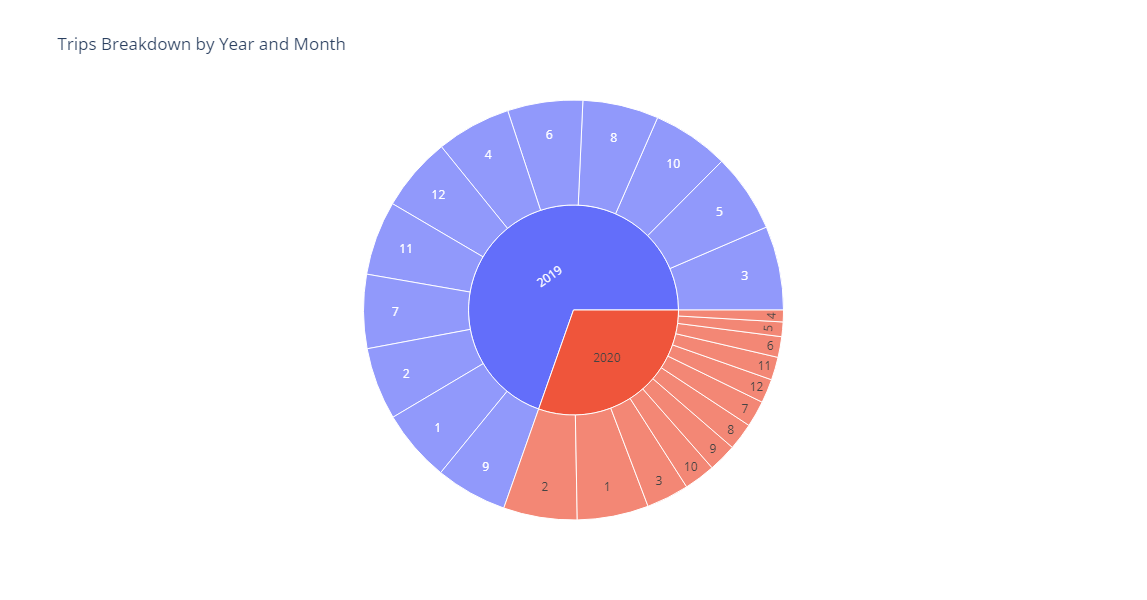

In [22]:
# YOUR CODE BEGINS
fig = px.sunburst(
    df_monthly,
    path=['year', 'month'],
    values='num_trips',
    title='Trips Breakdown by Year and Month',
    width=600,
    height=600,
)

fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [23]:
_test_case = 'deliverable-09'
_points = 4
_obfuscate = True

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.data[0].type, 'sunburst', 'Must be a sunburst chart')
tc.assertEqual(fig.layout.width, 600, 'Incorrect width')
tc.assertEqual(fig.layout.height, 600, 'Incorrect height')

fig_check = px.sunburst(
    df_monthly_check,
    path=['year', 'month'],
    values='num_trips',
    title='Trips Breakdown by Year and Month',
    width=600,
    height=600
)

np.testing.assert_array_equal(
    fig.data[0].labels,
    fig_check.data[0].labels,
    'Label(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].parents,
    fig_check.data[0].parents,
    'Parent(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].values,
    fig_check.data[0].values,
    'Value(s) mismatch'
)

---

### 🎯 Deliverable 10: Monthly number of trips in 2019 and 2020 (facet grid bar chart)

#### 👇 Tasks

- ✔️ Using `df_monthly`, create two bar charts side-by-side within a same figure showing the number of monthly trips for 2019 and 2020.
    - You will have to use a *facet grid* that we haven't covered in lectures.
    - A facet grid is a group of plots within one figure categorized by 1 or 2 criteria.
    - This deliverable expects you to do some research on your own, although the hint will provide majority of the code required to complete this task.
- ✔️ Set an appropriate title.
- ✔️ Use the `'simple_white'` theme (template).
- ✔️ Set the `width` to `1000` and `height` to `500`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/a0d6b0ed5d2d2148cc78d85f5a3e902863182e64/case-studies/rideshare-trips/sample-output-monthly-number-of-trips-facet-grid-bar-charts-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, `'column3'`, and `...`s with your own values from the code below.

```python
fig = px.bar(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    facet_col='column3',
    width=...,
    height=...,
    template='simple_white',
)
fig.show()
```

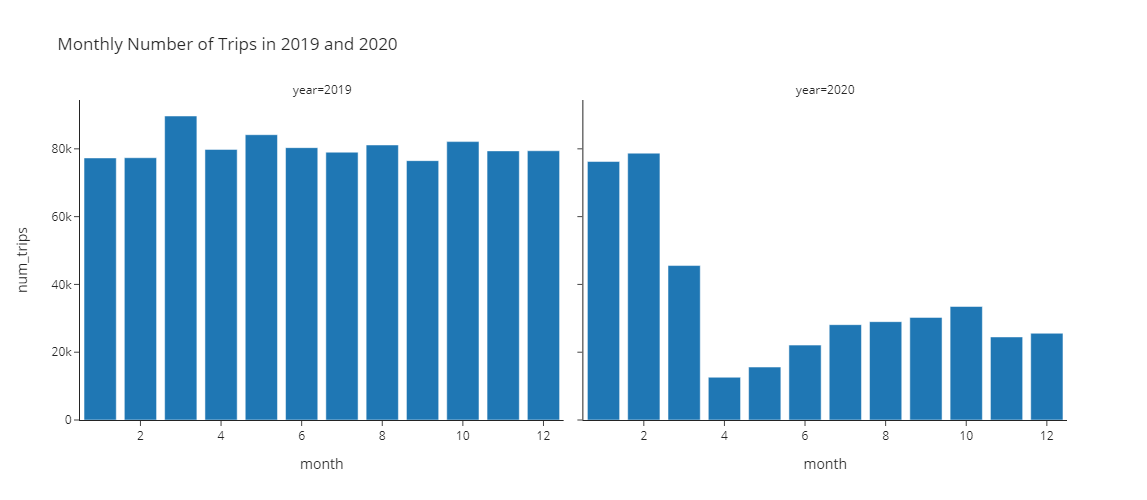

In [24]:
# YOUR CODE BEGINS
fig = px.bar(
    df_monthly,
    title='Monthly Number of Trips in 2019 and 2020',
    x='month',
    y='num_trips',
    facet_col='year',
    width=1000,
    height=500,
    template='simple_white',
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [25]:
_test_case = 'deliverable-10'
_points = 4

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(len(fig.data), 2, 'Must use a facet grid to display two bar charts side-by-side')
tc.assertEqual(fig.layout.width, 1000, 'Incorrect width')
tc.assertEqual(fig.layout.height, 500, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly template')

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHguYmFyKAogICAgZGZfbW9udGhseV9jaGV\
jaywKICAgIHRpdGxlPSdNb250aGx5IE51bWJlciBvZiBUcmlwcyBpbiAyMDE5IGFuZCAyMDIwJywKICAgIHg9\
J21vbnRoJywKICAgIHk9J251bV90cmlwcycsCiAgICBmYWNldF9jb2w9J3llYXInLAogICAgd2lkdGg9MTAwM\
CwKICAgIGhlaWdodD01MDAsCiAgICB0ZW1wbGF0ZT0ncGxvdGx5X2RhcmsnLAogICAgY29sb3I9J251bV90cm\
lwcycsCiAgICBjb2xvcl9jb250aW51b3VzX3NjYWxlPVsnV2hpdGUnLCAnWWVsbG93J10KKQ==')
eval(compile(decoded_code, '<string>', 'exec'))

for i in range(len(fig_check.data)):
    tc.assertEqual(fig.data[i].type, 'bar', 'Must be a bar chart')
    tc.assertEqual(fig.data[i].orientation, 'v', 'Must be a vertical bar chart')

    np.testing.assert_array_equal(
        fig.data[i].x,
        fig_check.data[i].x,
        'x-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].y,
        fig_check.data[i].y,
        'y-axis value(s) mismatch'
    )

---

### 🎯 Deliverable 11: Monthly number of trips in 2019 and 2020 (line plot)

#### 👇 Tasks

- ✔️ Using `df_monthly`, create a line plot of monthly number of trips.
    - Use `year` to create two separate lines (encoded by different colors) for 2019 and 2020.
- ✔️ Set an appropriate title.
- ✔️ Use the `'simple_white'` theme (template).
- ✔️ Set the `width` to `800` and `height` to `500`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/a0d6b0ed5d2d2148cc78d85f5a3e902863182e64/case-studies/rideshare-trips/sample-monthly-number-of-trips-annual-comparison-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, `'column3'`, and `...`s with your own values from the code below.

```python
fig = px.line(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    color='column3',
    template='simple_white',
    width=...,
    height=...
)
fig.show()
```

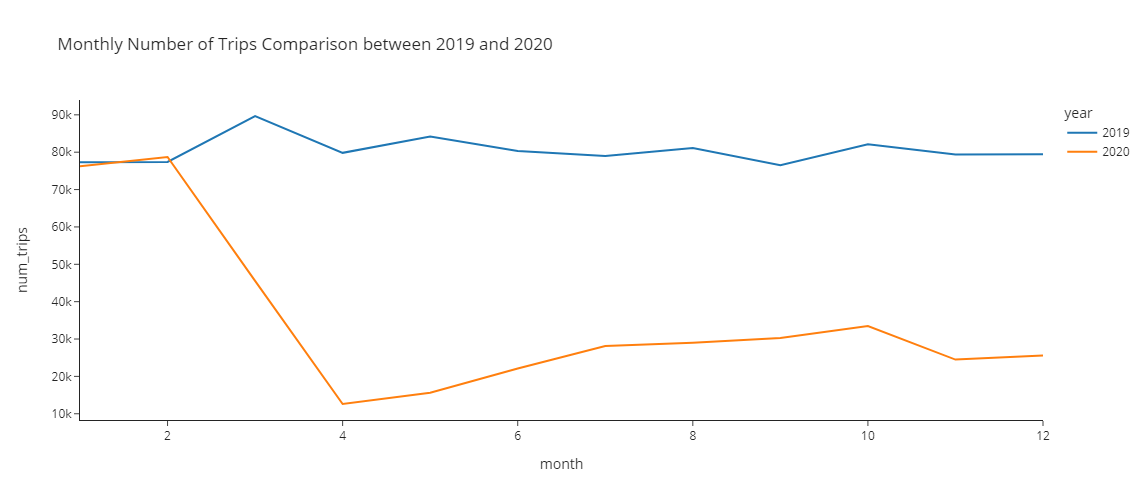

In [26]:
# YOUR CODE BEGINS
fig = px.line(
    df_monthly,
    title='Monthly Number of Trips Comparison between 2019 and 2020',
    x='month',
    y='num_trips',
    color='year',
    template='simple_white',
    width=800,
    height=500
)

fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [27]:
_test_case = 'deliverable-11'
_points = 4

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(len(fig.data), df_monthly_check['year'].nunique(), 'Must encode each year with different colors')
tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 500, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly theme (template)')

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHgubGluZSgKICAgIG\
RmX21vbnRobHlfY2hlY2ssCiAgICB0aXRsZT0nTW9udGhseSBOdW1iZXIgb2YgVHJpcH\
MgQ29tcGFyaXNvbiBiZXR3ZWVuIDIwMTkgYW5kIDIwMjAnLAogICAgeD0nbW9udGgnLA\
ogICAgeT0nbnVtX3RyaXBzJywKICAgIGNvbG9yPSd5ZWFyJywKICAgIHRlbXBsYXRlPS\
dwbG90bHlfZGFyaycsCiAgICB3aWR0aD04MDAsCiAgICBoZWlnaHQ9NTAwCik=')
eval(compile(decoded_code, '<string>', 'exec'))

for i in range(len(fig_check.data)):
    # In plotly, a line plot is a scatter plot with lines connecting the dots
    tc.assertEqual(fig.data[i].type, 'scatter', 'Must be a line plot')
    tc.assertIsNotNone(fig_check.data[i].line.color, 'Must be a line plot')

    np.testing.assert_array_equal(
        fig.data[i].x,
        fig_check.data[i].x,
        'x-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].y,
        fig_check.data[i].y,
        'y-axis value(s) mismatch'
    )

---

### 📌 Interpreting the pre-covid vs post-covid monthly number of trips

- 🔍 In March 2020, the number of trips have plummeted due to the widespread outbreak of COVID-19.
- 🔍 April 2020 was the worst month for ridesharing drivers.
- 🔍 The number of trips have slowly increased from April to October.
- 🔍 In November 2020, continued surge in the number of COVID-19 cases has caused the number of trips to go down again.

---

## 💵 Part 4: Visualize the effect of COVID-19 on tips

Did passengers tip more on average during the pandemic since they appreciated the drivers providing services during risky times?

Or did the passengers tip less on average since the pandemic has devastated the nation's economy in 2020?

---

### 🎯 Deliverable 12: Monthly average tip percentages in 2019 and 2020 (facet grid bar chart)

#### 👇 Tasks

- ✔️ Using `df_monthly`, create two bar charts side-by-side within a same figure showing the monthly average tip percentages in 2019 and 2020.
    - `tip_pct` column in `df_monthly` contains the monthly average tip percentages.
- ✔️ Set an appropriate title.
- ✔️ Use the `'simple_white'` theme (template).
- ✔️ Set the `width` to `1000` and `height` to `500`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/b77471d66d7f183ef01b37f8b03787c5828cd64b/case-studies/rideshare-trips/sample-monthly-average-tip-pct-facet-grid-bar-charts-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, `'column3'`, and `...`s with your own values from the code below.

```python
fig = px.bar(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    facet_col='column3',
    width=...,
    height=...,
    template='simple_white',
)
fig.update_layout(yaxis_tickformat=',.1%')
fig.update_layout(yaxis2_tickformat=',.1%')
fig.show()
```

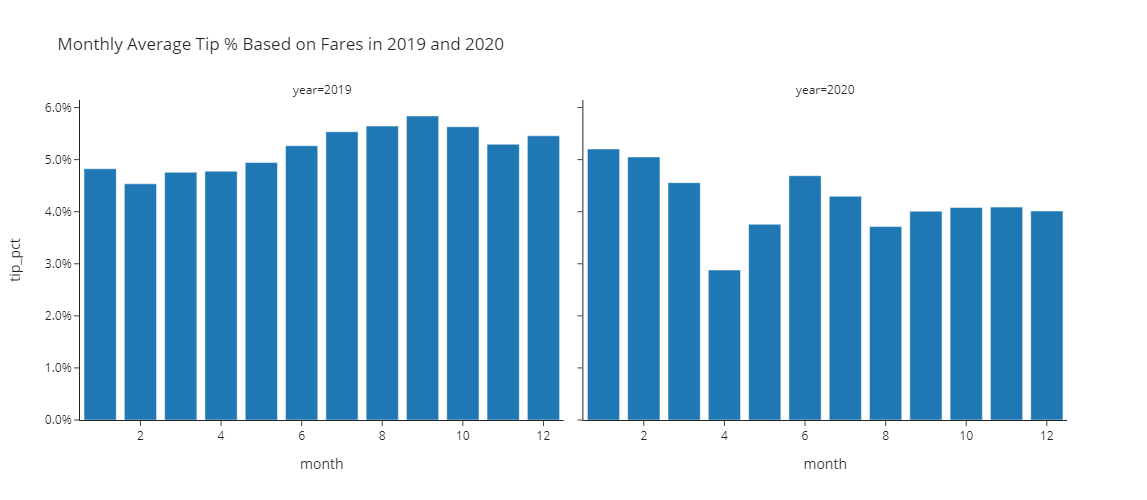

In [28]:
# YOUR CODE BEGINS
fig = px.bar(
    df_monthly,
    title='Monthly Average Tip % Based on Fares in 2019 and 2020',
    x='month',
    y='tip_pct',
    facet_col='year',
    width=1000,
    height=500,
    template='simple_white'
)
fig.update_layout(yaxis_tickformat=',.1%')
fig.update_layout(yaxis2_tickformat=',.1%')
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [29]:
_test_case = 'deliverable-12'
_points = 4
_obfuscate = True

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(len(fig.data), 2, 'Must use a facet grid to display two bar charts side-by-side')
tc.assertEqual(fig.layout.width, 1000, 'Incorrect width')
tc.assertEqual(fig.layout.height, 500, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly theme (template)')

fig_check = px.bar(
    df_monthly_check,
    title='Monthly Average Tip % Based on Fares in 2019 and 2020',
    x='month',
    y='tip_pct',
    facet_col='year',
    width=1000,
    height=500,
    template='plotly_dark',
    color='tip_pct',
    color_continuous_scale=['White', 'GreenYellow']
)

for i in range(len(fig_check.data)):
    tc.assertEqual(fig.data[i].type, 'bar', 'Must be a bar chart')
    tc.assertEqual(fig.data[i].orientation, 'v', 'Must be a vertical bar chart')

    np.testing.assert_array_equal(
        fig.data[i].x,
        fig_check.data[i].x,
        'x-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].y,
        fig_check.data[i].y,
        'y-axis value(s) mismatch'
    )

---

### 🎯 Deliverable 13: Monthly average tip percentages in 2019 and 2020

#### 👇 Tasks

- ✔️ Using `df_monthly`, create a line plot of monthly average tip percentages.
    - Use `year` to create two separate lines (encoded by different colors) for 2019 and 2020.
    - `tip_pct` column in `df_monthly` contains the monthly average tip percentages.
- ✔️ Set an appropriate title.
- ✔️ Use the `'simple_white'` theme (template).
- ✔️ Set the `width` to `800` and `height` to `500`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/b77471d66d7f183ef01b37f8b03787c5828cd64b/case-studies/rideshare-trips/sample-monthly-average-tip-pct-line-plot-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, `'column3'`, and `...`s with your own values from the code below.

```python
fig = px.line(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    color='column3',
    template='simple_white',
    width=...,
    height=...
)
fig.update_layout(yaxis_tickformat=',.1%')
fig.show()
```

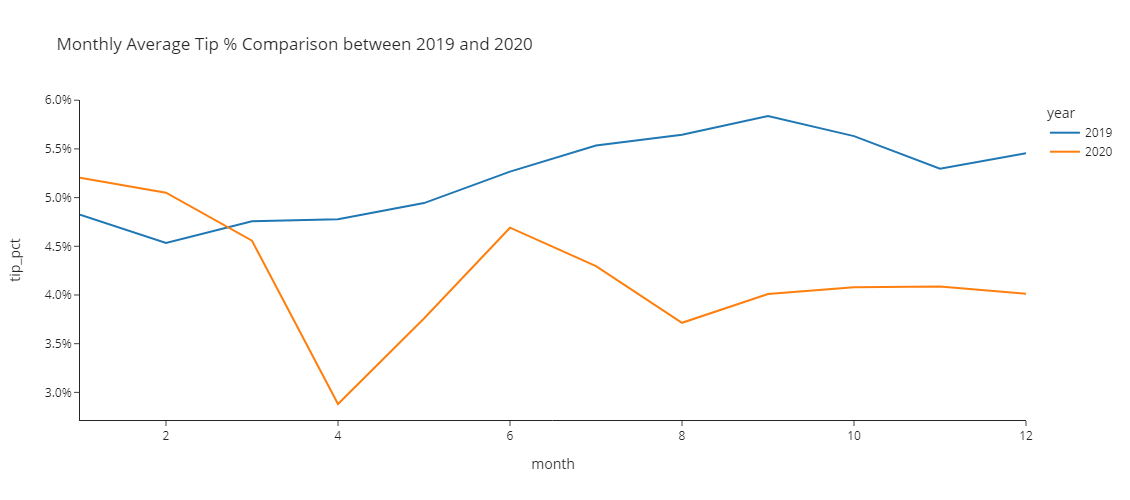

In [30]:
# YOUR CODE BEGINS
fig = px.line(
    df_monthly,
    title='Monthly Average Tip % Comparison between 2019 and 2020',
    x='month',
    y='tip_pct',
    color='year',
    template='simple_white',
    width=800,
    height=500
)
fig.update_layout(yaxis_tickformat=',.1%')
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [31]:
_test_case = 'deliverable-13'
_points = 4
_obfuscate = True

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(len(fig.data), df_monthly_check['year'].nunique(), 'Must encode each year with different colors')
tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 500, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly theme (template)')

fig_check = px.line(
    df_monthly_check,
    title='Monthly Average Tip % Comparison between 2019 and 2020',
    x='month',
    y='tip_pct',
    color='year',
    template='plotly_dark',
    width=800,
    height=500
)

for i in range(len(fig_check.data)):
    # In plotly, a line plot is a scatter plot with lines connecting the dots
    tc.assertEqual(fig.data[i].type, 'scatter', 'Must be a line plot')
    tc.assertIsNotNone(fig_check.data[i].line.color, 'Must be a line plot')

    np.testing.assert_array_equal(
        fig.data[i].x,
        fig_check.data[i].x,
        'x-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].y,
        fig_check.data[i].y,
        'y-axis value(s) mismatch'
    )

---

### 📌 Interpreting the pre-covid vs post-covid average percentage of tips

- 🔍 Passengers tipped less after the COVID-19 outbreak.
- 🔍 Possible explanations:
    - COVID-19 has caused an economic downturn.
    - Many people have also lost jobs during this period.
    - COVID-19 may have prevented the driver and the passenger(s) from having a conversation. Less conversation could result in less tips.

---

## ✨ Part 5: Trips right before July 4th fireworks

Every July 4th, massive crowds gather around places (or boats) to view the fireworks. How did July 4th become the "national fireworks day"? July 4, 1776 is considered to be the birth of United States of Amercia as an independent nation. The Continental Congress approved the final wording of the Declaration of Independence on July 4, 1776. The first-ever recorded July 4th fireworks celebration was held in Philadelphia on July 4, 1777. Since then, there hasn't been an Independence Day without a firework. 💥💥 

[[Source 1]](https://www.constitutionfacts.com/us-declaration-of-independence/fourth-of-july/#:~:text=We%20celebrate%20American%20Independence%20Day,America%20as%20an%20independent%20nation.) [[Source 2]](https://www.bhg.com/holidays/july-4th/traditions/why-fireworks-on-fourth-of-july/#:~:text=Ever%20since%20Americans%20have%20proudly,sky%20every%20Fourth%20of%20July.&text=The%20Fourth%20of%20July%20celebrates,the%20Continental%20Congress%20in%201776.)

In this part, you will find trips started on July 4th between 5-6 PM and create different scatter plots based on those trips.

---

### 🎯 Deliverable 14: Filter July 4th 5-6 PM trips

#### 👇 Tasks

- ✔️ Using `df`, filter rows where:
    - `month` is `7` (July) **and**,
    - `day` is `4` (4th) **and**,
    - `hour` is `17` (All trips starting between 5-6 pm)
- ✔️ Store the filtered DataFrame to a new variable named `df_july_fourth`.
- ✔️ `df` should remain unaltered after running your code.

#### 🚀 Hint

The code below filters rows where `column` is `10`, `column2` is `20`, and `column3` is `30`. The filtered DataFrame is stored to a new variable named `my_filtered`.

```python
my_filtered_df = my_df[(my_df['column1'] == 10) & (my_df['column2'] == 20) & (my_df['column3'] == 30)]
```

In [32]:
# YOUR CODE BEGINS
df_july_fourth = df[(df['month'] == 7) & (df['day'] == 4) & (df['hour'] == 17)]
# YOUR CODE ENDS

display(df_july_fourth.sample(3))

start  trip_seconds  trip_miles      pickup_area  \
496950 2019-07-04 17:00:00           755         2.1        West Town   
497046 2019-07-04 17:30:00          1259         7.2  Near South Side   
497071 2019-07-04 17:45:00           250         0.8  Near North Side   

       dropoff_area  fare  tip  additional_charges  trip_total  \
496950    West Town   7.5  0.0                2.55       10.05   
497046    Lake View  12.5  0.0                2.55       15.05   
497071    West Town   5.0  0.0                2.55        7.55   

        shared_trip_authorized  trips_pooled  pickup_lat  pickup_lon  \
496950                   False             1   41.892658  -87.652534   
497046                   False             1   41.859350  -87.617358   
497071                   False             1   41.904935  -87.649907   

        dropoff_lat  dropoff_lon  year  month  day  dayofweek  hour  \
496950    41.908379   -87.670945  2019      7    4          3    17   
497046    41.946295   -87.654298  2019      7    4          3    17   
497071    41.898306   -87.653614  2019      7    4          3    17   

       weekday_weekend  
496950         weekday  
497046         weekday  
497071         weekday

#### 🧭 Check your work

In [33]:
_test_case = 'deliverable-14'
_points = 3

decoded_code = base64.b64decode(b'ZGZfanVseV9mb3VydGhfY2hlY2sgPSBkZl9iYWNrdXBbKGRmX2JhY2t1cFs\
nbW9udGgnXSA9PSA3KSAmIChkZl9iYWNrdXBbJ2RheSddID09IDQpICYgKGRmX2JhY2t1cFsnaG91ciddID09IDE3KV0=')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(df_july_fourth.shape, df_july_fourth_check.shape, 'Incorrect number of rows and/or columns')
pd.testing.assert_frame_equal(
    df_july_fourth.sort_values(df_july_fourth.columns.tolist()).reset_index(drop=True),
    df_july_fourth_check.sort_values(df_july_fourth_check.columns.tolist()).reset_index(drop=True),
    check_like=True
)

---

### 🎯 Deliverable 15: July 4th 5-6 PM trips scatter plots

#### 👇 Tasks

- ✔️ Using `df_july_fourth`, create two scatter plots for each year side-by-side within a same figure with the following axes.
    - `x`: `trip_seconds`,
    - `y`: `trip_miles`,
- ✔️ Use the `trip_total` column to differente the sizes of points.
- ✔️ Use the `shared_trip_authorized` column to differente the colors of points.
- ✔️ Set an appropriate title.
- ✔️ Use the `'simple_white'` theme (template).
- ✔️ Set the `width` to `1200` and `height` to `500`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/sample-trip-seconds-vs-trip-miles-july-4th-trips-scatter-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, `'column3'`, `'column4'`, `'column5'`, and `...`s with your own values from the code below.

```python
fig = px.scatter(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    size='column3',
    facet_col='column4',
    color='column5',
    template='simple_white',
    width=...,
    height=...,
)
fig.show()
```

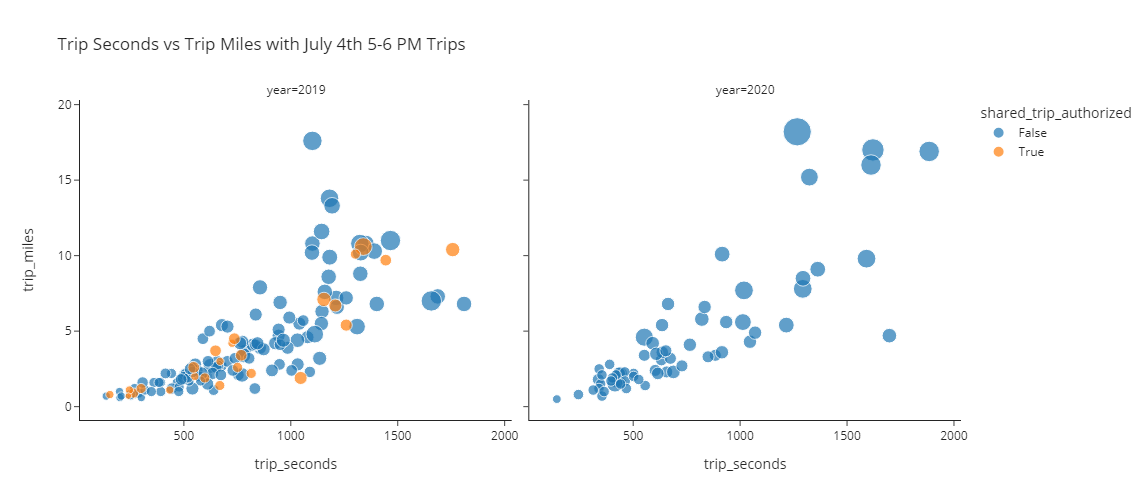

In [34]:
# YOUR CODE BEGINS
fig = px.scatter(
    df_july_fourth,
    title='Trip Seconds vs Trip Miles with July 4th 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    size='trip_total',
    facet_col='year',
    color='shared_trip_authorized',
    template='simple_white',
    width=1200,
    height=500,
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [35]:
_test_case = 'deliverable-15'
_points = 3

# DO NOT CHANGE THE CODE IN THIS CELL
fig_check = px.scatter(
    df_july_fourth_check,
    title='Trip Seconds vs Trip Miles with July 4th 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    size='trip_total',
    facet_col='year',
    color='shared_trip_authorized',
    template='plotly_dark',
    width=1200,
    height=500,
)


tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(len(fig.data), len(fig_check.data), 
               'Must use a facet grid to display two scatter plots side-by-side with color-encoding')
tc.assertEqual(fig.layout.width, 1200, 'Incorrect width')
tc.assertEqual(fig.layout.height, 500, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly theme (template)')

for i in range(len(fig_check.data)):
    tc.assertEqual(fig.data[i].type, 'scatter', 'Must be a scatter plot')

    np.testing.assert_array_equal(
        fig.data[i].x,
        fig_check.data[i].x,
        'x-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].y,
        fig_check.data[i].y,
        'y-axis value(s) mismatch'
    )

---

### 📌 Interpreting the pre-covid vs post-covid scatter plots

- 🔍 There is a positive linear relationship between `trip_seconds` and `trip_miles`.
- 🔍 The number of trips made on July 4th has decreased signifcantly in 2020 due to COVID-19.
- 🔍 There are no pooled trips (`shared_trips_authorized == True`) in 2020. 
    - Why? Uber and Lyft both suspended pooled rides to limit the spread of coronavirus ([Reuters article here](https://www.reuters.com/article/us-health-coronavirus-uber/uber-lyft-suspend-pooled-rides-in-u-s-canada-to-limit-spread-of-coronavirus-idUSKBN214192)) beginning in March 2020.

---

### 🎯 Deliverable 16: July 4th 5-6 PM trips 3D scatter plots (Pre-COVID)

#### 👇 Tasks

- ✔️ Using `df_july_fourth`, create a 3D scatter plot of trips **in 2019** using the following axes.
    - `x`: `trip_seconds`,
    - `y`: `trip_miles`,
    - `z`: `trip_total`
- ✔️ Use the `shared_trip_authorized` column to differente the colors of points.
- ✔️ Set an appropriate title.
- ✔️ Use the `'plotly_dark'` theme (template).
- ✔️ Set both the `width` and `height` to `800`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/c3060e2ed215f9e7e13156b60a2c79764885f2c0/case-studies/rideshare-trips/sample-trip-seconds-vs-miles-vs-total-2019-3d-scatter-01.png?raw=true)

#### 🚀 Hint

Replace `'column1'`, `'column2'`, `'column3'`, `'column4'`, and `...`s with your own values from the code below.

```python
fig = px.scatter_3d(
    df_july_fourth[df_july_fourth['year'] == 2019],
    title='Your Title Here',
    x='column1',
    y='column2',
    z='column3',
    color='column4',
    template='plotly_dark',
    width=...,
    height=...
)
fig.show()
```

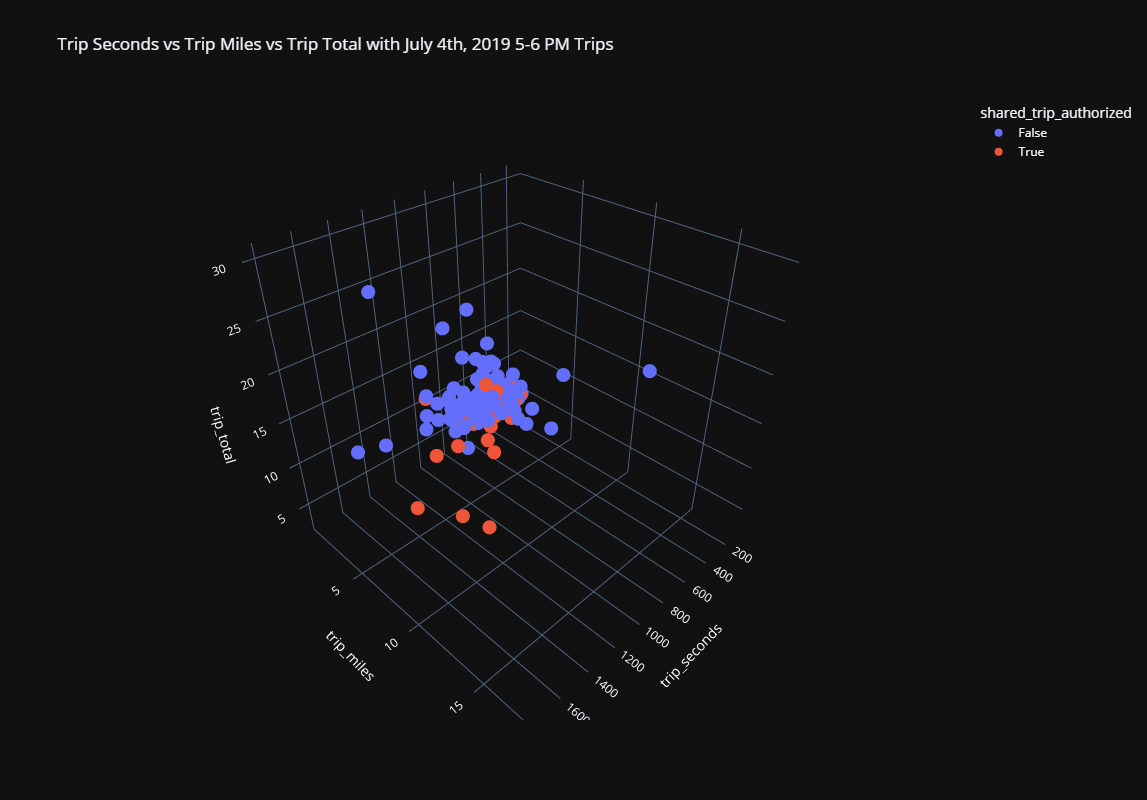

In [36]:
# YOUR CODE BEGINS
fig = px.scatter_3d(
    df_july_fourth[df_july_fourth['year'] == 2019],
    title='Trip Seconds vs Trip Miles vs Trip Total with July 4th, 2019 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    z='trip_total',
    color='shared_trip_authorized',
    template='plotly_dark',
    width=800,
    height=800
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [37]:
_test_case = 'deliverable-16'
_points = 3

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHguc2NhdHRl\
cl8zZCgKICAgIGRmX2p1bHlfZm91cnRoX2NoZWNrW2RmX2p1bHlfZm91cnRoX2\
NoZWNrWyd5ZWFyJ10gPT0gMjAxOV0sCiAgICB0aXRsZT0nVHJpcCBTZWNvbmRz\
IHZzIFRyaXAgTWlsZXMgdnMgVHJpcCBUb3RhbCB3aXRoIEp1bHkgNHRoLCAyMD\
E5IDUtNiBQTSBUcmlwcycsCiAgICB4PSd0cmlwX3NlY29uZHMnLAogICAgeT0n\
dHJpcF9taWxlcycsCiAgICB6PSd0cmlwX3RvdGFsJywKICAgIGNvbG9yPSdzaG\
FyZWRfdHJpcF9hdXRob3JpemVkJywKICAgIHRlbXBsYXRlPSdwbG90bHlfZGFy\
aycsCiAgICB3aWR0aD04MDAsCiAgICBoZWlnaHQ9ODAwCik=')
eval(compile(decoded_code, '<string>', 'exec'))


# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(len(fig.data), len(fig_check.data), "Check whether you've supplied the color parameter to px.scatter_3d()")
tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 800, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['plotly_dark'], 'Incorrect plotly theme (template)')

for i in range(len(fig_check.data)):
    tc.assertEqual(fig.data[i].type, 'scatter3d', 'Must be a 3D scatter plot')

    np.testing.assert_array_equal(
        fig.data[i].x,
        fig_check.data[i].x,
        'x-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].y,
        fig_check.data[i].y,
        'y-axis value(s) mismatch'
    )

    np.testing.assert_array_equal(
        fig.data[i].z,
        fig_check.data[i].z,
        'z-axis value(s) mismatch'
    )

▶️ Run the code cell below to repeat the previous deliverable with trips **in 2020**.

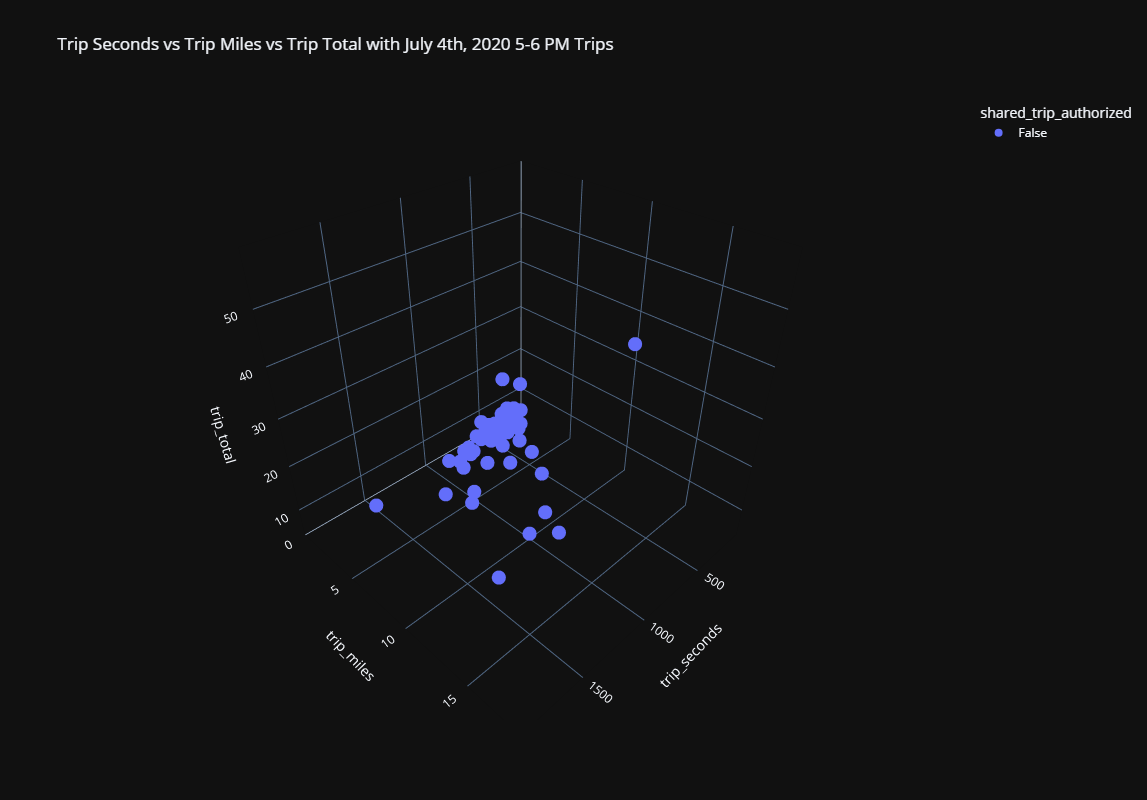

In [38]:
# DO NOT CHANGE THE CODE BELOW
fig = px.scatter_3d(
    df_july_fourth[df_july_fourth['year'] == 2020],
    title='Trip Seconds vs Trip Miles vs Trip Total with July 4th, 2020 5-6 PM Trips',
    x='trip_seconds',
    y='trip_miles',
    z='trip_total',
    color='shared_trip_authorized',
    template='plotly_dark',
    width=800,
    height=800
)
fig.show()

---

### 📌 Interpreting the pre-covid vs post-covid 3D scatter plots

- 🔍 There is a positive linear relationship between `trip_seconds`, `trip_miles`, and `trip_total`.
- 🔍 You may have to rotate the view of your 3D scatter plots to witness the linear relationship.

---

## 🏡 Part 6: Pickup/dropff areas analysis

In this part, you will find the top 20 pickup areas and analyze the trips originating from those areas.

---

### 🎯 Deliverable 17: Find top 20 pickup areas by number of trips

#### 👇 Tasks

- ✔️ Find the top 20 pickup areas in `df_listings` by number of listings.
- ✔️ Store the result to a new variable named `top_20_pickup_areas`.
- ✔️ `top_20_pickup_areas` should be a Python `list` type.
- ✔️ We'll give you the fully-working code below.

#### 🔥 Solution

![Code](https://github.com/bdi475/images/blob/1923a8c4dff4775790bd333b285321f289334fbe/case-studies/rideshare-trips/code-find-top-20-pickup-areas-01.png?raw=true)

In [39]:
# YOUR CODE BEGINS
top_20_pickup_areas = df['pickup_area'].value_counts().head(20).index.tolist()
# YOUR CODE ENDS

print(top_20_pickup_areas)

['Near North Side', 'Loop', 'Near West Side', 'Lake View', 'West Town', 'Lincoln Park', 'Logan Square', 'Uptown', 'Ohare', 'Near South Side', 'Edgewater', 'Hyde Park', 'Lower West Side', 'North Center', 'Austin', 'Avondale', 'Lincoln Square', 'Rogers Park', 'Irving Park', 'South Shore']


#### 🧭 Check your work

In [40]:
_test_case = 'deliverable-17'
_points = 2

decoded_code = base64.b64decode(b'dG9wXzIwX3BpY2t1cF9hcmVhc19jaGVjayA9IGRmX2JhY\
2t1cFsncGlja3VwX2FyZWEnXS52YWx1ZV9jb3VudHMoKS5oZWFkKDIwKS5pbmRleC50b2xpc3QoKQ==')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(set(top_20_pickup_areas), set(top_20_pickup_areas_check), 'Incorrect pickup areas')

---

### 🎯 Deliverable 18: Filter trips from top 20 pickup areas

#### 👇 Tasks

- ✔️ Using `df`, filter only the rows where the `pickup_area` is in `top_20_pickup_areas`.
- ✔️ Store the filtered result to a new variable named `df_filtered`.

#### 🚀 Hint

```python
filtered_dataframe = my_dataframe[my_dataframe['my_column'].isin(my_list)]
```

In [41]:
# YOUR CODE BEGINS
df_filtered = df[df['pickup_area'].isin(top_20_pickup_areas)]
# YOUR CODE ENDS

display(df_filtered.head(3))
print(f'There are {df_filtered.shape[0]} rows and {df_filtered.shape[1]} columns in the filtered DataFrame')

start  trip_seconds  trip_miles      pickup_area     dropoff_area  \
1 2019-01-01           697         3.0  Near North Side   Near West Side   
2 2019-01-01          1598         4.7     Lincoln Park             Loop   
3 2019-01-01           573         0.9  Near North Side  Near North Side   

   fare  tip  additional_charges  trip_total  shared_trip_authorized  \
1   7.5  0.0                 2.5        10.0                   False   
2  10.0  2.0                 2.5        14.5                   False   
3   5.0  0.0                 2.5         7.5                   False   

   trips_pooled  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  year  \
1             1   41.892073  -87.628874    41.885300   -87.642808  2019   
2             1   41.922083  -87.634156    41.870607   -87.622173  2019   
3             1   41.892042  -87.631864    41.892508   -87.626215  2019   

   month  day  dayofweek  hour weekday_weekend  
1      1    1          1     0         weekday  
2      1    1          1     0         weekday  
3      1    1          1     0         weekday

There are 1084442 rows and 21 columns in the filtered DataFrame


#### 🧭 Check your work

In [42]:
_test_case = 'deliverable-18'
_points = 2

decoded_code = base64.b64decode(b'ZGZfZmlsdGVyZWRfY2hlY2sgPSBkZl9iYWNrdXBbKGR\
mX2JhY2t1cFsncGlja3VwX2FyZWEnXS5pc2luKHRvcF8yMF9waWNrdXBfYXJlYXNfY2hlY2spKV0=')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(df_filtered.shape, df_filtered_check.shape, 'Incorrect number of rows and/or columns')

---

### 🎯 Deliverable 19: Number of trips and average trip total by pickup_area

#### 👇 Tasks

- ✔️ Using `df_filtered`, calculate the following aggregated values by `pickup_area`.
    - `num_trips`: Number of trips
    - `trip_total`: Average `trip_total`
- ✔️ Store the resulting DataFrame to a new variable named `df_by_pickup_area`.
- ✔️ `df_by_pickup_area` should have three columns - `pickup_area`, `num_trips`, and `trip_total`.
- ✔️ `print(df_by_pickup_area.columns.tolist())` should print out `['pickup_area', 'num_trips', 'trip_total']`.

#### 🔑 Expected Output

|    | pickup_area   |   num_trips |   trip_total |
|---:|:--------------|------------:|-------------:|
|  0 | Austin        |       16851 |      13.2463 |
|  1 | Avondale      |       16425 |      12.6238 |
|  2 | Edgewater     |       21689 |      13.8675 |
|  3 | Hyde Park     |       21303 |      14.524  |
|  4 | Irving Park   |       14570 |      13.3267 |

In [43]:
# YOUR CODE BEGINS
df_by_pickup_area = df_filtered.groupby(
    'pickup_area', as_index=False
).agg({
    'start': 'count',
    'trip_total': 'mean',
}).rename(columns={
    'start': 'num_trips'
})
# YOUR CODE ENDS

display(df_by_pickup_area.head(5))

pickup_area  num_trips  trip_total
0       Austin      16851   13.246273
1     Avondale      16425   12.623803
2    Edgewater      21689   13.867470
3    Hyde Park      21303   14.523999
4  Irving Park      14570   13.326660

#### 🧭 Check your work

In [44]:
_test_case = 'deliverable-19'
_points = 4

decoded_code = base64.b64decode(b'ZGZfYnlfcGlja3VwX2FyZWFfY2hlY2sgPSBkZl9maWx0Z\
XJlZF9jaGVjay5ncm91cGJ5KAogICAgJ3BpY2t1cF9hcmVhJywgYXNfaW5kZXg9RmFsc2UKKS5hZ2co\
ewogICAgJ3N0YXJ0JzogJ2NvdW50JywKICAgICd0cmlwX3RvdGFsJzogJ21lYW4nLAp9KS5yZW5hbWU\
oY29sdW1ucz17CiAgICAnc3RhcnQnOiAnbnVtX3RyaXBzJwp9KQ==')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(
    df_by_pickup_area.columns.tolist(),
    df_by_pickup_area_check.columns.tolist(),
    'Column(s) mismatch'
)

tc.assertEqual(
    df_by_pickup_area.shape,
    df_by_pickup_area_check.shape,
    'Incorrect number of rows and/or columns'
)

pd.testing.assert_frame_equal(
    df_by_pickup_area.sort_values(df_by_pickup_area.columns.tolist()).reset_index(drop=True),
    df_by_pickup_area_check.sort_values(df_by_pickup_area_check.columns.tolist()).reset_index(drop=True),
    check_like=True
)

---

### 🎯 Deliverable 20: Number of trips by pickup area (bar chart)

#### 👇 Tasks

- ✔️ Using `df_by_pickup_area`, create a horizontal bar chart displaying the number of trips by each pickup area.
- ✔️ Set an appropriate title.
- ✔️ Set the height to `800` and do not supply a width (by default, a Plotly figure will expand to fit the window if the `width` parameter is omitted).
- ✔️ Use the `simple_white` (template).
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/sample-num-trips-by-pickup-area-bar-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, and `...`s with your own values from the code below.

```python
fig = px.bar(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    text='column1',
    template='simple_white',
    height=...
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(categoryorder='total ascending')
fig.show()
```

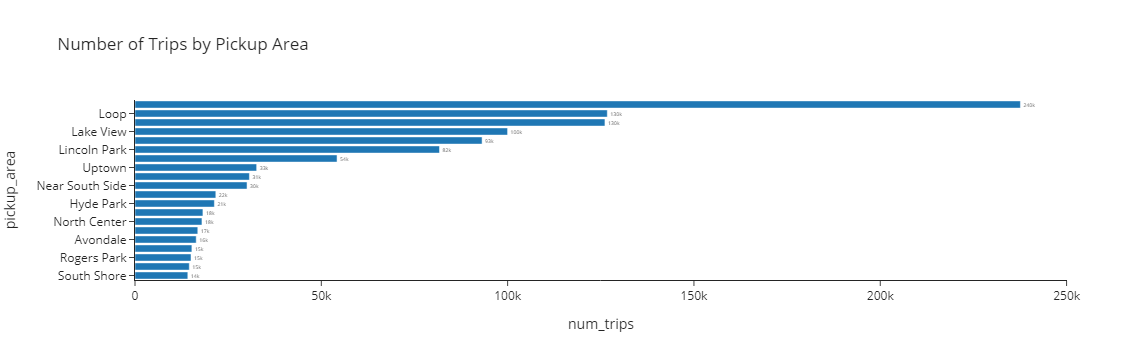

In [45]:
# YOUR CODE BEGINS
fig = px.bar(
    df_by_pickup_area,
    title='Number of Trips by Pickup Area',
    x='num_trips',
    y='pickup_area',
    text='num_trips',
    template='simple_white',
    height=800
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(categoryorder='total ascending')
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [46]:
_test_case = 'deliverable-20'
_points = 3

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.layout.height, 800, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly theme (template)')

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHguYmFyKAog\
ICAgZGZfYnlfcGlja3VwX2FyZWFfY2hlY2ssCiAgICB0aXRsZT0nTnVtYmVyIG\
9mIFRyaXBzIGJ5IFBpY2t1cCBBcmVhJywKICAgIHg9J251bV90cmlwcycsCiAg\
ICB5PSdwaWNrdXBfYXJlYScsCiAgICBjb2xvcj0nbnVtX3RyaXBzJywKICAgIG\
NvbG9yX2NvbnRpbnVvdXNfc2NhbGU9J2VtcmxkJywKICAgIHRleHQ9J251bV90\
cmlwcycsCiAgICB0ZW1wbGF0ZT0ncGxvdGx5X3doaXRlJywKICAgIGhlaWdodD04MDAKKQ==')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(fig.data[0].type, 'bar', 'Must be a line plot')

np.testing.assert_array_equal(
    fig.data[0].x,
    fig_check.data[0].x,
    'x-axis value(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].y,
    fig_check.data[0].y,
    'y-axis value(s) mismatch'
)

---

### 🎯 Deliverable 21: Average trip total by pickup area (bar chart)

#### 👇 Tasks

- ✔️ Using `df_by_pickup_area`, create a horizontal bar chart displaying the average trip total by each pickup area.
- ✔️ Set an appropriate title.
- ✔️ Set the height to `800` and do not supply a width (by default, a Plotly figure will expand to fit the window if the `width` parameter is omitted).
- ✔️ Use the `simple_white` theme (template).
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/sample-avg-trip-total-by-pickup-area-bar-01.png?raw=true)

#### 🚀 Hint

Replace `my_dataframe`, `'column1'`, `'column2'`, and `...`s with your own values from the code below.

```python
fig = px.bar(
    my_dataframe,
    title='Your Title Here',
    x='column1',
    y='column2',
    text='column1',
    template='simple_white',
    height=...
)
fig.update_traces(texttemplate='$%{text:.1f}', textposition='outside')
fig.update_yaxes(categoryorder='total ascending')
fig.show()
```

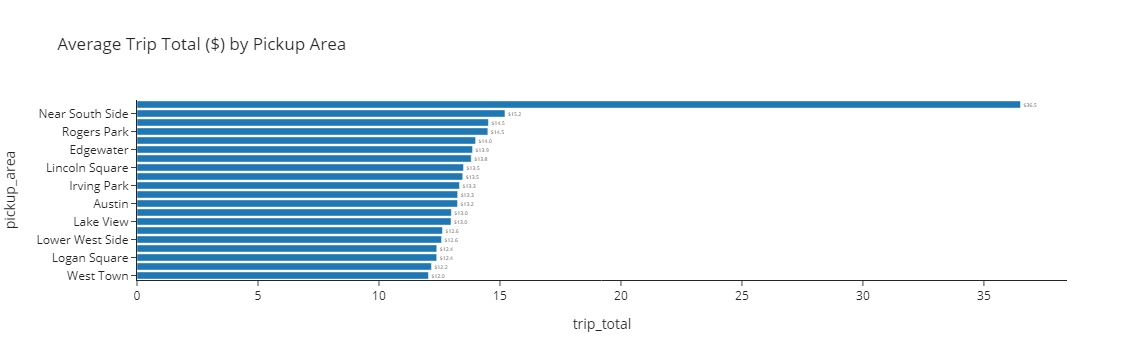

In [47]:
# YOUR CODE BEGINS
fig = px.bar(
    df_by_pickup_area,
    title='Average Trip Total ($) by Pickup Area',
    x='trip_total',
    y='pickup_area',
    text='trip_total',
    template='simple_white',
    height=800
)
fig.update_traces(texttemplate='$%{text:.1f}', textposition='outside')
fig.update_yaxes(categoryorder='total ascending')
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [48]:
_test_case = 'deliverable-21'
_points = 3

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.layout.height, 800, 'Incorrect height')
tc.assertEqual(fig.layout.template, pio.templates['simple_white'], 'Incorrect plotly theme (template)')

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHguYmFyKAogICAg\
ZGZfYnlfcGlja3VwX2FyZWFfY2hlY2ssCiAgICB0aXRsZT0nQXZlcmFnZSBUcmlwIF\
RvdGFsICgkKSBieSBQaWNrdXAgQXJlYScsCiAgICB4PSd0cmlwX3RvdGFsJywKICAg\
IHk9J3BpY2t1cF9hcmVhJywKICAgIHRleHQ9J3RyaXBfdG90YWwnLAogICAgdGVtcG\
xhdGU9J3Bsb3RseV93aGl0ZScsCiAgICBoZWlnaHQ9ODAwCik=')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(fig.data[0].type, fig_check.data[0].type, f'Must be a {fig_check.data[0].type} chart')

np.testing.assert_array_equal(
    fig.data[0].x,
    fig_check.data[0].x,
    'x-axis value(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].y,
    fig_check.data[0].y,
    'y-axis value(s) mismatch'
)

---

### 🎯 Deliverable 22: Pickup area breakdown (treemap)

#### 👇 Tasks

- ✔️ Using `df_by_pickup_area`, create a treemap of pickup areas.
- ✔️ Set an appropriate title.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`

#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/sample-pickup-area-treemap-01.png?raw=true)

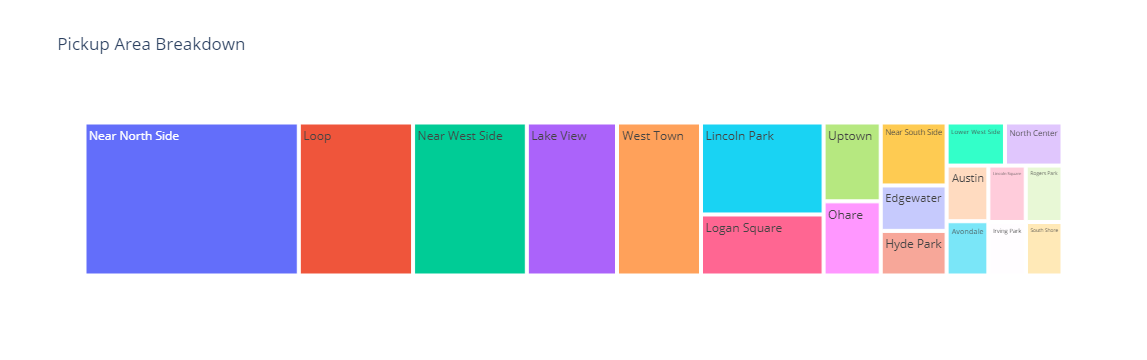

In [49]:
# YOUR CODE BEGINS
fig = px.treemap(
    df_by_pickup_area,
    title='Pickup Area Breakdown',
    path=['pickup_area'],
    values='num_trips',
    height=600
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [50]:
_test_case = 'deliverable-22'
_points = 3

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHgudHJlZW1hcCg\
KICAgIGRmX2J5X3BpY2t1cF9hcmVhX2NoZWNrLAogICAgdGl0bGU9J1BpY2t1cCBB\
cmVhIEJyZWFrZG93bicsCiAgICBwYXRoPVsncGlja3VwX2FyZWEnXSwKICAgIHZhb\
HVlcz0nbnVtX3RyaXBzJywKICAgIGhlaWdodD02MDAKKQ==')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(fig.data[0].type, 'treemap', 'Must be a treemap')

np.testing.assert_array_equal(
    fig.data[0].labels,
    fig_check.data[0].labels,
    'Label value(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].parents,
    fig_check.data[0].parents,
    'Parent value(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].values,
    fig_check.data[0].values,
    'Size value(s) mismatch'
)

---

### 📌 Interpreting the pickup area visualizations

- 🔍 "Near North Side" is the most popular pickup area, followed by "Loop" and "Near West Side".
- 🔍 The average trip total for rides beginning in Ohare is relatively much higher compared to any other pickup area.

---

## 🦄 Part 7: Pickup area + weekday/weekend

In this part, you will add a new dimension (weekday/weekend) to the top 20 pickup areas.

---

### 🎯 Deliverable 23: Number of trips and average trip total by pickup area + weekday/weekend

#### 👇 Tasks

- ✔️ Using `df_filtered`, calculate the following aggregated values by `pickup_area` and `weekday_weekend`.
    - `num_trips`: Number of trips
    - `trip_total`: Average `trip_total`
- ✔️ Store the resulting DataFrame to a new variable named `df_by_pickup_area_weekday_weekend`.
- ✔️ `print(df_by_pickup_area_weekday_weekend.columns.tolist())` should print out `['pickup_area', 'weekday_weekend', 'num_trips', 'trip_total']`.
- ✔️ `df_filtered` should remain unaltered.

#### 🔑 Expected Output

|    | pickup_area   | weekday_weekend   |   num_trips |   trip_total |
|---:|:--------------|:------------------|------------:|-------------:|
|  0 | Austin        | weekday           |        9064 |      13.2139 |
|  1 | Austin        | weekend           |        7787 |      13.284  |
|  2 | Avondale      | weekday           |        7942 |      12.6175 |
|  3 | Avondale      | weekend           |        8483 |      12.6297 |
|  4 | Edgewater     | weekday           |       10745 |      14.1318 |
|  5 | Edgewater     | weekend           |       10944 |      13.608  |
|  6 | Hyde Park     | weekday           |       11852 |      14.1627 |
|  7 | Hyde Park     | weekend           |        9451 |      14.977  |
|  8 | Irving Park   | weekday           |        7307 |      13.4092 |
|  9 | Irving Park   | weekend           |        7263 |      13.2436 |

In [51]:
# YOUR CODE BEGINS
df_by_pickup_area_weekday_weekend = df_filtered.groupby(
    ['pickup_area', 'weekday_weekend'], as_index=False
).agg({
    'start': 'count',
    'trip_total': 'mean',
}).rename(columns={
    'start': 'num_trips'
})
# YOUR CODE ENDS

display(df_by_pickup_area_weekday_weekend.head(10))

pickup_area weekday_weekend  num_trips  trip_total
0       Austin         weekday       9064   13.213864
1       Austin         weekend       7787   13.283996
2     Avondale         weekday       7942   12.617546
3     Avondale         weekend       8483   12.629662
4    Edgewater         weekday      10745   14.131752
5    Edgewater         weekend      10944   13.607994
6    Hyde Park         weekday      11852   14.162735
7    Hyde Park         weekend       9451   14.977041
8  Irving Park         weekday       7307   13.409209
9  Irving Park         weekend       7263   13.243611

#### 🧭 Check your work

In [52]:
_test_case = 'deliverable-23'
_points = 6

decoded_code = base64.b64decode(b'CmRmX2J5X3BpY2t1cF9hcmVhX3dlZWtkYXlfd2Vla2VuZF9jaGVj\
ayA9IGRmX2ZpbHRlcmVkX2NoZWNrLmdyb3VwYnkoCiAgICBbJ3BpY2t1cF9hcmVhJywgJ3dlZWtkYXlfd2Vla2\
VuZCddLCBhc19pbmRleD1GYWxzZQopLmFnZyh7CiAgICAnc3RhcnQnOiAnY291bnQnLAogICAgJ3RyaXBfdG90\
YWwnOiAnbWVhbicsCn0pLnJlbmFtZShjb2x1bW5zPXsKICAgICdzdGFydCc6ICdudW1fdHJpcHMnCn0pCg==')
eval(compile(decoded_code, '<string>', 'exec'))

tc.assertEqual(
    df_by_pickup_area_weekday_weekend.columns.tolist(),
    df_by_pickup_area_weekday_weekend_check.columns.tolist(),
    'Column(s) mismatch'
)

tc.assertEqual(
    df_by_pickup_area_weekday_weekend.shape,
    df_by_pickup_area_weekday_weekend_check.shape,
    'Incorrect number of rows and/or columns'
)

pd.testing.assert_frame_equal(
    df_by_pickup_area_weekday_weekend.sort_values(df_by_pickup_area.columns.tolist()).reset_index(drop=True),
    df_by_pickup_area_weekday_weekend_check.sort_values(df_by_pickup_area_check.columns.tolist()).reset_index(drop=True),
    check_like=True
)

---

### 🎯 Deliverable 24: Pickup area + weekday/weekend breakdown (sunburst)

#### 👇 Tasks

- ✔️ Using `df_by_pickup_area_weekday_weekend`, create a sunburst chart describing the breakdown of number of trips by pickup area and weekday/weekend classification.
- ✔️ Set an appropriate title.
- ✔️ Set both the width and height to `800`.
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`


#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/sample-pickup-area-by-weekday-weekend-sunburst-01.png?raw=true)

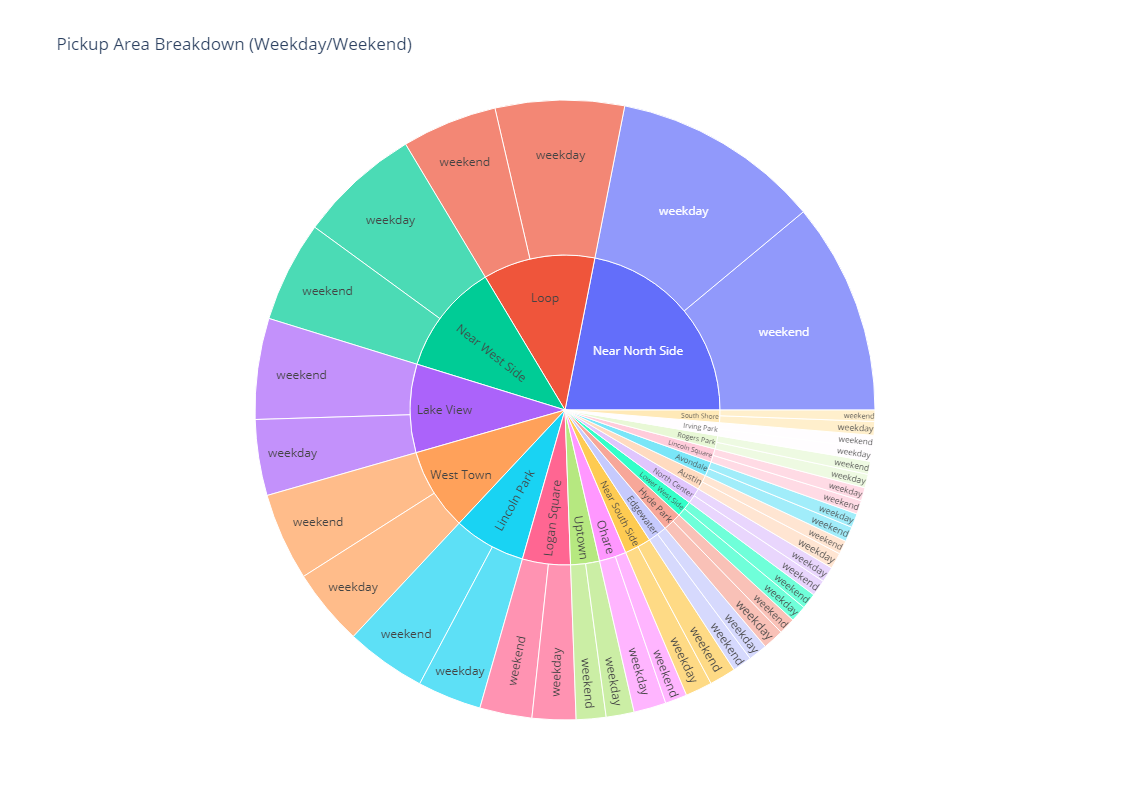

In [53]:
# YOUR CODE BEGINS
fig = px.sunburst(
    df_by_pickup_area_weekday_weekend,
    path=['pickup_area', 'weekday_weekend'],
    values='num_trips',
    title='Pickup Area Breakdown (Weekday/Weekend)',
    width=800,
    height=800
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [54]:
_test_case = 'deliverable-24'
_points = 4

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.data[0].type, 'sunburst', 'Must be a sunburst chart')
tc.assertEqual(fig.layout.width, 800, 'Incorrect width')
tc.assertEqual(fig.layout.height, 800, 'Incorrect height')

decoded_code = base64.b64decode(b'ZmlnX2NoZWNrID0gcHguc3VuYnVyc3\
QoCiAgICBkZl9ieV9waWNrdXBfYXJlYV93ZWVrZGF5X3dlZWtlbmQsCiAgICBwYX\
RoPVsncGlja3VwX2FyZWEnLCAnd2Vla2RheV93ZWVrZW5kJ10sCiAgICB2YWx1ZX\
M9J251bV90cmlwcycsCiAgICB0aXRsZT0nUGlja3VwIEFyZWEgQnJlYWtkb3duIC\
hXZWVrZGF5L1dlZWtlbmQpJywKICAgIHdpZHRoPTgwMCwKICAgIGhlaWdodD04MDAKKQ==')
eval(compile(decoded_code, '<string>', 'exec'))

np.testing.assert_array_equal(
    fig.data[0].labels,
    fig_check.data[0].labels,
    'Label(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].parents,
    fig_check.data[0].parents,
    'Parent(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].values,
    fig_check.data[0].values,
    'Value(s) mismatch'
)

---

### 🎯 Deliverable 25: Pickup area + weekday/weekend breakdown (treemap)

#### 👇 Tasks


- ✔️ Using `df_by_pickup_area_weekday_weekend`, create a treemap chart describing the breakdown of number of trips by pickup area and weekday/weekend classification.
- ✔️ Set an appropriate title.
- ✔️ Set the height to `600` (do not set the width).
- ✔️ Store your figure to a variable named `fig`.
- ✔️ Display the figure using `fig.show()`


#### 🔑 Sample Output

![Sample Output](https://github.com/bdi475/images/blob/main/case-studies/rideshare-trips/sample-pickup-area-by-weekday-weekend-treemap-01.png?raw=true)

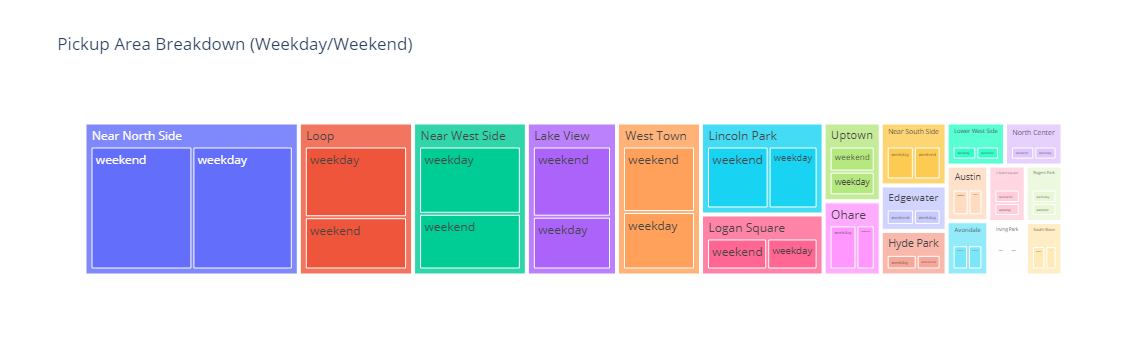

In [55]:
# YOUR CODE BEGINS
fig = px.treemap(
    df_by_pickup_area_weekday_weekend,
    path=['pickup_area', 'weekday_weekend'],
    values='num_trips',
    title='Pickup Area Breakdown (Weekday/Weekend)',
    height=600
)
fig.show()
# YOUR CODE ENDS

#### 🧭 Check your work

In [56]:
_test_case = 'deliverable-25'
_points = 4

tc.assertIsNotNone(fig.layout.title.text, 'Missing figure title')
tc.assertEqual(fig.data[0].type, 'treemap', 'Must be a treemap chart')
tc.assertEqual(fig.layout.height, 600, 'Incorrect height')

decoded_code = base64.b64decode(b'ZmlnID0gcHgudHJlZW1hcCgKICAgIGRm\
X2J5X3BpY2t1cF9hcmVhX3dlZWtkYXlfd2Vla2VuZCwKICAgIHBhdGg9WydwaWNrdX\
BfYXJlYScsICd3ZWVrZGF5X3dlZWtlbmQnXSwKICAgIHZhbHVlcz0nbnVtX3RyaXBz\
JywKICAgIHRpdGxlPSdQaWNrdXAgQXJlYSBCcmVha2Rvd24gKFdlZWtkYXkvV2Vla2\
VuZCknLAogICAgaGVpZ2h0PTYwMAop')
eval(compile(decoded_code, '<string>', 'exec'))

np.testing.assert_array_equal(
    fig.data[0].labels,
    fig_check.data[0].labels,
    'Label(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].parents,
    fig_check.data[0].parents,
    'Parent(s) mismatch'
)

np.testing.assert_array_equal(
    fig.data[0].values,
    fig_check.data[0].values,
    'Value(s) mismatch'
)